In [ ]:
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules



In [5]:
book=pd.read_csv('book.csv')

In [13]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [14]:
book.shape

(2000, 11)

In [23]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [15]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


In [16]:
#Data preprocessing not required, data already in the transaction format

# Apriori Algorithm

In [18]:
from mlxtend.frequent_patterns import apriori,association_rules

# 1. support=10%(0.1) and 70%(0.7) confidence in Association rules

In [21]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [27]:
#with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [31]:
##An antecedent is an item found within the data. A consequent is an item found in combination with the antecedent.
# if lift value = 1 means independent and lift >1 means positive influence and lift <1 means negative influence
#leverage value  0 indicates independence.

In [33]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [38]:
#Lift>1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [54]:

rules[rules['lift']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


Text(0.5, 1.0, 'SUPPORT VS CONFIDENCE')

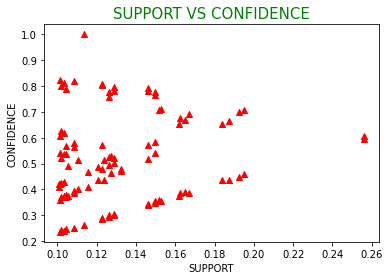

In [52]:
#visualization of data
import matplotlib.pyplot as plt
plt.scatter(rules.support,rules.confidence,c='r',marker='^')
plt.xlabel('SUPPORT')
plt.ylabel('CONFIDENCE')
plt.title('SUPPORT VS CONFIDENCE',size=15,color='green')


In [76]:
#replace frozen set with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))

In [ ]:
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [82]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_,consequents_
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,YouthBks,ChildBks
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,ChildBks,YouthBks
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,CookBks,ChildBks
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,ChildBks,CookBks
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,DoItYBks,ChildBks
...,...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,"CookBks,GeogBks",ArtBks
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,"ArtBks,CookBks",GeogBks
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,GeogBks,"ArtBks,CookBks"
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,ArtBks,"CookBks,GeogBks"


In [83]:
#creating a pivot table for list >1 
rules_dff=rules[rules['lift']>1].pivot(index='antecedents_',columns='consequents_',values='lift')

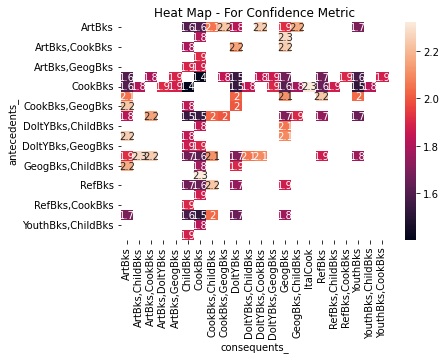

In [84]:
sns.heatmap(rules_dff ,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.show()

# 2. Association rules with 20% Support and 60% confidence


In [6]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [10]:
#0.2 min_support
frequent_itemsets2=apriori(book,min_support=0.2,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [11]:
#with 70% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
(rules2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


Text(0.5, 1.0, 'SUPPORT VS CONFIDENCE')

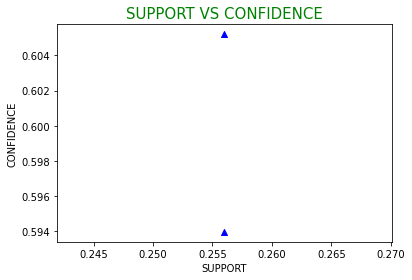

In [13]:
#visualization of data
import matplotlib.pyplot as plt
plt.scatter(rules2.support,rules2.confidence,c='b',marker='^')
plt.xlabel('SUPPORT')
plt.ylabel('CONFIDENCE')
plt.title('SUPPORT VS CONFIDENCE',size=15,color='green')

# 2. Association rules with 5% Support 95% and confidence

In [16]:
#0.5 min_support
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, CookBks, GeogBks, YouthBks)"
96,0.0560,"(CookBks, ArtBks, GeogBks, YouthBks)"
97,0.0650,"(DoItYBks, CookBks, ArtBks, GeogBks)"
98,0.0510,"(ChildBks, YouthBks, CookBks, GeogBks, DoItYBks)"


In [21]:
#with 95% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.95)
(rules3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(DoItYBks, CookBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(DoItYBks, ChildBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(DoItYBks, ChildBks, CookBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(GeogBks),"(DoItYBks, ChildBks, CookBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733


Text(0.5, 1.0, 'SUPPORT VS CONFIDENCE')

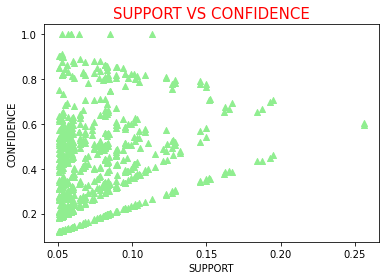

In [30]:
#visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules3.support,rules3.confidence,c='lightgreen',marker='^')
plt.xlabel('SUPPORT')
plt.ylabel('CONFIDENCE')
plt.title('SUPPORT VS CONFIDENCE',size=15,color='red')

Text(0.5, 1.0, 'CONFIDENCE vs LIFT')

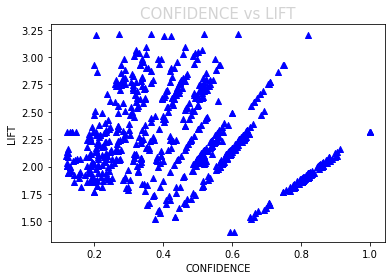

In [31]:
#visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules3.confidence,rules3.lift,c='b',marker='^')
plt.xlabel('CONFIDENCE')
plt.ylabel('LIFT')
plt.title('CONFIDENCE vs LIFT',size=15,color='lightgray')